## Import & Initialize

In [3]:
import os
import time
from datetime import datetime
from dotenv import load_dotenv

import googlemaps
import gmplot

import pandas as pd

In [4]:
load_dotenv()
API_KEY = os.getenv('GOOGLE_MAPS_API_KEY_3')

In [5]:
gmaps = googlemaps.Client(key=API_KEY)

## Roads Names

#### First Try:

In [4]:
# def get_roads_in_location(gmaps_client, query, location, radius=50000):
#     roads_data = []
    
#     # Perform the text search for roads
#     try:
#         places_result = gmaps_client.places(query=query, location=location, radius=radius)
        
#         # Print the response status to debug
#         print(f"API Response Status: {places_result.get('status')}")
        
#         # Print the raw results to see what is coming from the API
#         # print("Places Results (raw data):", places_result['results'])

#         # Check if there are results
#         if places_result['status'] == 'ZERO_RESULTS':
#             print("No results found for the query.")
#             return roads_data
#         elif places_result['status'] != 'OK':
#             print(f"Error in API response: {places_result['status']}")
#             return roads_data
        
#         # Extract road-related names and their locations from initial results
#         for place in places_result['results']:
#             place_name = place.get('name', '')
#             # Check if the place name contains common road keywords
#             if any(keyword in place_name.lower() for keyword in ['road', 'street', 'highway', 'route']):
#                 road_info = {
#                     'name': place['name'],
#                     'latitude': place['geometry']['location']['lat'],
#                     'longitude': place['geometry']['location']['lng']
#                 }
#                 roads_data.append(road_info)
        
#         # Check if more results are available via pagination (next_page_token)
#         while 'next_page_token' in places_result:
#             time.sleep(2)  # Add delay to allow token activation
#             places_result = gmaps_client.places(query=query, page_token=places_result['next_page_token'])
#             # print(f"Next Page API Response Status: {places_result.get('status')}")
            
#             if places_result['status'] == 'ZERO_RESULTS':
#                 print("No more results found on next page.")
#                 break
#             elif places_result['status'] != 'OK':
#                 print(f"Error in API response on next page: {places_result['status']}")
#                 break
            
#             # Extract road names and their locations from paginated results
#             for place in places_result['results']:
#                 place_name = place.get('name', '')
#                 # Check if the place name contains common road keywords
#                 if any(keyword in place_name.lower() for keyword in ['road', 'street', 'highway', 'route']):
#                     road_info = {
#                         'name': place['name'],
#                         'latitude': place['geometry']['location']['lat'],
#                         'longitude': place['geometry']['location']['lng']
#                     }
#                     roads_data.append(road_info)
    
#     except Exception as e:
#         print(f"An error occurred: {str(e)}")
    
#     return roads_data


In [5]:
# riyadh_location = (24.7136, 46.6753)

# # Update query to search for roads instead of main roads
# query = "شارع"

# # Get the roads in Riyadh
# roads_data = get_roads_in_location(gmaps, query, riyadh_location)

# # Print road names and details
# print("Roads in Riyadh:")
# for road in roads_data:
#     print(f"Name: {road['name']}, Latitude: {road['latitude']}, Longitude: {road['longitude']}")

In [6]:
# road_first = ['11565 Olaya Street, Riyadh','1564 Makkah Al Mukarramah Branch Road, Riyadh','1st Floor, Dove Plaza, (Hyper Panda 4406, 6554 تقاطع شارع أم الحمام مع شارع رضوان، حي أم الحمام الغربي،, Riyadh','2459 Makkah Al Mukarramah Branch Road, Riyadh','3004 No. 58, 12213 8285 Khurais Intersection with Olaya General Street, Riyadh','3019 Abu Bakr Alrazi Street, Riyadh','7520 Ibrahim Ala Nafisi Street Al Madhar, الرياض','8096 King Abdulaziz Road, Riyadh','9033 King Fahd Road, Tower 1, Riyadh','Abi Bakr As Siddiq Road, Riyadh','Al Awsat Valley Street, Riyadh','Al Muhandis Masaid Al Anqari, PM9J+G55, Riyadh','Al Takhassousi, Norah Square, Riyadh','Al Takhassousi, PMG3+72H, Riyadh','Al Takhassousi, Riyadh','Almughirah Ibn Shubah, Riyadh','Andalusia Hotel, Building No-10, Street No-6, Capital O 237, Riyadh','Ash Shaikh Abdullah Al Anqari, Riyadh','Building No.7358 Al Hanka, Riyadh','Center Point, King Abdullah Road, king abdullah road beside home centre, Riyadh','Dababt street, PP34+WFC, Al Hayat Newspaper Building, Riyadh','Imam Saud Bin Abdulaziz Bin Mohammed Road, Riyadh','Khalid Ibn Yazid Ibn Muawiyah, Riyadh','King Abdulaziz Road, PMWJ+CPV, Riyadh','King Abdullah Branch Road, Riyadh','King Fahd Branch Road, Riyadh','King Fahd Road, Riyadh','King Faisal Foundation, King Fahd Branch Road, مبنى, Riyadh','King Salman Neighborhood','Kingdom Centre, Olaya Street, Riyadh','Makkah Al Mukarramah Road, Riyadh','Merfal Apartment, Urwa Bin Ward Street, طريق الأمام سعود بن عبدالعزيز - شارع عروة بن الورد - حي المروج','Office No. 203, Block C, Al Akaria Plaza, Olaya Road, الرياض','Olaya Street, Riyadh','Opposite To The Kingdom Tower, Olaya Street, Riyadh','Prince Muhammad Ibn Abd Al Aziz, Riyadh','Prince Sultan Bin Abdulaziz Rd, Al Olaya, Riyadh','Rafha Street, PPM2+557, Riyadh','Rafha Street, Salah Ad Din, Riyadh','Riyadh','Thalateen Street, Riyadh','prince faisal, Riyadh','tahlia street Riyadh 11322 Saudi Arabia, Riyadh','حي الملك فهد،, طريق الملك فهد, Riyadh','سنتر بوينت, شارع العليــــــا العام , قرب, Riyadh','شارع التخصصي،, Riyadh','شارع, PM2J+FQ2, Riyadh','طريق الملك فهد, Olaya, الرياض','طريق مكة المكرمة، طريق خريص، مقابل مدينة الملك فهد الطبية, Riyadh']

#### Second Try:

In [7]:
# def get_road_names(gmaps, location):
#     road_names = []
#     places_result = gmaps.places_nearby(location=location, radius=50000, type='establishment')
    
#     road_names.extend([place.get('vicinity', '') for place in places_result['results']])
    
#     while 'next_page_token' in places_result:
#         time.sleep(2)
#         places_result = gmaps.places_nearby(location=location, radius=50000, type='establishment', page_token=places_result['next_page_token'])
#         road_names.extend([place.get('vicinity', '') for place in places_result['results']])
    
#     return road_names

# location = {'lat': 24.7136, 'lng': 46.6753}  # Coordinates for Riyadh center
# roads = get_road_names(gmaps, location)

# for road in roads:
#     print(road)


In [8]:
# road_second = ['Al Urubah Road','Unnamed Road','Olaya Street','Al Ulaya','Khalid Ibn Yazid Ibn Muawiyah','شارع العليا','Abdullah Ibn Zamah','Sayyidah Ar Ruasa','طريق العروبة','Al Khourmah','العروبه','حراج بن قاسم']

In [9]:
# road_third = ['Yaqub Ibn Ghanaim','البديعات','أبي صادق المخزومي','Ibn Al Qutub','Al Dahiah','Unnamed Road','Abi Al Faraj Ibn Al Jawzi','Wadi Awal','ابن الأثير','Almalga','أبي البقاء التيمي','ابن هبة الله','Adhbah','سلطان بن بجاد','أبي البركات النسفي','Prince Sultan Bin Salman Bin Abdulaziz Street','Saad Al Kindi','Jawdah','Muhammad As Sabati','مؤتة','Ibn Hamid','92','Abdul Rahman Ibn Hassan Al Umran','Al Hafez Abi Al Mouammar','Al Suhail','Buraidah Ibn Al Husaib','Street Number 84','Ibn Abdulwarith','شارع التخصصي','Abd Al Mouhsen Al Shami','Al Foudoul','Abdulwahab Ibn Abdulqadir','Ash Shulah','Mouta Street','أبي النجح إسماعيل','Al Amir Muhammad Ibn Abdul Aziz Branch Road','شارع الوحدة','Ashiqar','ابن إياس الكناني','Yousef Al Ayoubi','Street Number 94','Abdulhaq Ibn Ali Al Malki','أبي المفاخر الحموي','الأمير محمد بن عبدالعزيز','Abi Ibrahim Al Bardani','Al Maidhar','Wadi Ghulail','Al Mundhir Ibn Abdullah','عتاب الأموي','Al Tounisi','التلمساني','أبي غالب الكاتب','أبي الحسن العطار','Abi Sadik Al Mokhsumi Street','Ibn Al Attar','أبي الفتح القارئ','Muqdam','Algla','قتيبة بن شريح','Al Jazan','عبدالواحد بن جديد','Al Harbi','Uzaihir','Mubarak Al Douaik','Hussain Rushdi','Ibn Ammar Al Asadi','ممر3','Al lethamah','Ahmad Al Itab','Ad Dawid','Ibn Ad Dujaji','Ibn Al Shater','Khousaibah','As Sinani','Abi Backer Bin Niama Path','نعمة','ابن الآبار','Al Badiyah','Abdallah Bin Mohammad Al Talmisani','التاجر','أم البهاء البغدادية','Rumah','Al Jamuh Al Ansari','أبي حامد الغزالي','Abdulrahman Ibn Hibatullah','Al Anadol','Al Hawamidiyah','شارع','عبدالواحد بن عبدالله النصري','Ibn Al Kharasani','Jablah Ibn Malek','Umm Al Karam Az Zahawiyah','Abduljalil Alqurtubi','King Abdallah Ibn Abd Al Aziz','صعائد','Abdulqader Al Jazairi','Jabal Thahlan Path','أبي بكر الصفي','Al Baz','Jabal Nuam','السلطان أبي المغازي','Malik Ibn Khalaf','الثاملة','Abd Al Hakim Al Jamhi','Naim Ibn Masud','أبي الحسن الهاشمي','Abd Al Khalek Ibn Ahmad','Abdullah Ibn Al Arqam','Abi Jafar Ibn Zuraiq','Bashir Ibn Mahfouz','Mura Bin Ghaith Path','As Sanad','موسى بن عقبة، العليا،','Juneah Path','الأفراح','محمود الساوى','وادي خيبر','No. 68','Ibn Al Atar Path','Abdullah Ibn Yasir','Abi Al Qasim Al Balawi','أبي المظفر بن باكير','شارع الأمير سلطان بن سلمان بن عبدالعزيز','Uthman Al Harqumi','Huda Ash Sham','Om Alsaud','الديوان','Abi Abdullah Ibn Dawud','Al Ghuraira','Abi Salih Al Jaili','Yahia Al Bakri','Al Amli','Salih Al Krafi','Ibn Hibatullah','Abi Al Qasim Idris','Al Mansur As Saadi','عمر بن سعيد بن مالك','العماد بن محمد الأصبهاني','Daou Al Sabah','At Takhassusi Branch Street','Abdulrahman Al Azdi','Al Mounzir Ibn Abdullah','الكاتب','وادي العمارية','Malilah','Al Mouwaffaq Al Sabouni','Yosef Al Bazaz Street','الغزولي','Abd Al Wahed Ibn Jarir','Ibn Amamah','Al Jarrah Al Hakami','Zat Al Sawari','Street Number 90','Al Safwi','Safiy Ad Din Al Hali','65','Ibn Al Mamun','Ath Thamad','Abi Al Hussain Al Habri','جبل فحيط','وادي صفير','الغنائم','Umm Hakim','Jabal Qamir','Abi Amr Al Yaseri','ابن أبي ليلي','Sajir','ابن ابي ليلي','Al Shatinah','Abdulrahim Al Maghribi','Al Ajri','Ibn Matir Al Hakami','Az Zurayqat','Al Athal','Abi Al Thoraya Path','أيوب الثعلبى','No. 48','AI- waround neighborhood','يعقوب بن داود','At Takhassusi Branch','Musa Bin Oakba Path','Isa Bin Fairuz','Rafiq Al Hariri','Wadi Mara','Ibn Ad Daminah','شارع الأمير ممدوح بن عبدالعزيز','Ibn Abi Al Hadeed Lane','أبي محمد النساج','Hafr Al Bab','Ibn Al Wathiq','Dumah Al Jandal','ابن المنتخب','Ibn Hydarah','الراشدية','509','الأنجب','Ibrahim Ash Shami','Ash Shuaybah','الخميس','Mansur Al Bahwati','شارع بدر التمام','احمد بن حمبل','Abbas Al Jawhari','شهاب بن أبى بكر','Omar Al Shehab','Al Buraq','عبدالله بن سليمان الحمدان','الأخوة','Ibn Futuh','احمد عبدالغفور عطار','Abi Nuzar Al Jamal','Ibn Zawtan','Abi Al Fadl','Fadl Ibn Salmah','عبدالرحمن بن علي آل الشيخ','أبي العلاء البصري','شارع عبدالله بن سليمان الحمدان','Ibn Al Shaikh','بخاري','Fatimah Umm Al Baha','RQJA3630 Ibn Al Amid','Sabtah','Qasim Al Jabiri','أبي أرطى','ابن الصباغ','No. 66','Qoudamah Ibn Madoun','شارع وادي الكردي','King Abdulaziz Road','Al Qalanasi','محمود بن الربيع','المزرع','Abi Bakr Ibn Al Faqih','الاميراحمد بن عبدالعزيز','وادي الثمامة','طريق الامير محمد بن عبدالعزيز','الأغلب بن عمرو','Thabet Al Loughaoui','أمين واصف','Abi Al Fath Ath Thaqafi','Ibn Atiyah','Abi Tamim Al Musawi','ابن الساعي','أبي مصعب المدني','أبي الحسين الحبري','Ibrahim Ar Rasafi','Duhyah','Khalf Ibn Mudan','رشيد الدين الصوري','Ibn Shakir','Al Masoudi','Prince Abdullah Ibn Faisal Ibn Abdulaziz','الملك فهد الفرعي','شارع جبل المضابيع','Al Raht','Abi Al Mouhasin Al Tousi','Al Katip Street','Aiun Al Jawa Street','شارع 98','Tamam Al Habshi','Al Jamouh Al Ansari','أحمد بن فضلان','Ain Al Thaghrah','Al Wousaiti','ابن الناظر','المواقيتي','ابن أبي الحديد','Abi Hayyan At Tawhidi','Ibn Abanah Al Ashbili','Ibn Naim','Alimam Altartushi Almaliki Path','Al Mughirah Ibn Iyash','الاثير','Salih Ibn Salim','البرقان','Muhammad Ibn Al Zahabi','Mahmud as Sawi','Ar Rabi Al Ahmar','Hatim Ibn Dhafir','Sayyidah Ar Ruasa','ابن عقيل','ابن بركة','إسماعيل السمذي','Al Hazimi','Abi Ath Thana Al Maghribi','Al Mizri','طريق الملك عبدالله الفرعي','Jabalah Ibn Harithah','Hilal Ibn Badr','الدرعي','Az Zanbaq','Mazin Ibn Shaiban','Ibn Al Qazzaz','ثابت بن معاذ الأنصاري','Al Badir','وادي الابطح','علي العريف','Fathuallah Ash Shafi','ابن ابي حليم','ممر7','Ahmad Alghafi Street','خالد بن يزيد','Abi Hadid','الشلال','إبراهيم بن نشا القيسي','Daoud Al Asbahani','Ibn Ibad Al Katib','Al Walid At Tamimi','الرحالة','Al Zouhour','Umm Sadirah','Jafar Alskmi','Rizgallah Altamimi','شارع العليا، حي الملك فهد','Thavit Al Lghawt','أبي جعفر بن زريق','Al Alaya','Ras Al Ain','رقم 62','Ath Thamilah','Mohammad Al Koufi','Mahmoud Ibn Al Rabih','الداخلة','Wadi Hanifah Street','Ar Rabi Ibn Anas','Orjowan','الأمان','الشعلة','Sulaiman Al Murtada','شارع أم الحمام','ابن أمامة','شهاب بن أبي بكر','King Abdullah Branch Road','Al Kutbi','Al Dalimi','Abi Jafar Al Gharnati','Al Mahjar','Oumro Al Qais','As Suraya','Ibn Uqail','أحمد الواعظ','خير الدين الرملي','Tahliah Street','الاملي','Abdullah Ibn Yarbu','Yahia Al Rahwani','الناصرة','إبراهيم بن الحمصي','الغريراء','حارثة بن سهل','أبي محمد الجوهري','Abi Al Ala Ibn Zahr','Al Awwam Ibn Kaab','حسين رشدي','Hasan Shakir Aflatun','Al Awsat Valley Street','خبيرا','مثيبة','Abdulqadir As Saadi','Qutn Ibn Harithah','عيسي الثعالبي','Abi Al Fath Al Qari','مرخ','Al Muthwah','ابن أبي المفاخر','Al Hulyah','أبي عمران الرشيد','الأملي','خالد بن عمير العدوي البصري','حراء','التخصصي','رقم 78','Hatib Ibn Amr','البلاغة','Jafar Ibn Abi Talib','Umar Al Qazzaz','Abi Bakr Al Wasiti','Al Bekaa','سعيد الأسدي','Mouzaffar Al Sawadi','Katib Al Dine','Jabal Amayah','Al Shaikh Hamad Al Jasir','Prince Nayef Ibn Abd Al Aziz','أبي العباس الوكيل','Al Shaqiq','Al Qamra','الربيع الأحمر','Al Sultan Abi Al Maghazi','ابن آجروم','Abi Al Khair Al Sakhaoui','Al Kamli','ابن الأزرق','Al Batinah','Al Bahriah','Al Burj','أبي الفرج بن الجوزي','أبي حديد','Abi Mansur Al Nousouli','ابي المفاخر الحموي','Jaw','Al Shaikh Abdallah','Wadi Al Thoumamah','جبل كويكب','شارع وادي الثمامة','يحيي بن علي','Mujashi Ibn Masud','الزاهد أويس','Ali Ibn Salih','Ahmad Ibrahim Al Ghazzawi','Shuraih Ibn Al Arith','Abdulrazaq an Najari','أبي موسى الجمال','أبي سليك',"Obaidah Ibn Rabi'ah",'Nisah','Khair Al Dine Al Ramli','دسمان','البرج','Abi Salik','Panda Parking','Tatouan','محمد ابن ابراهيم ابن جبير','Al Basala','Muhammad Ibn Wahaib','Al Burqat','khalid ibn sinan al absi','Abi As Sadat Al Mubarak','Abdulaziz Al Qabiti','التخصصي الفرعي','Mazra','إبراهيم الرصافي','Ubaidah Ibn Rabia','العليا، 2721','وادي الريحان','Wadi Al Tesrear Street','Ibn An Namis','الأمير خالد بن محمد بن عبدالرحمن','Prince Turki Bin Abdulaziz Al Awal Road','Ibn Abd Al Wahid','Mouheiddine Al Naisaburi','لطف بن محمد الزبيري','Saad Ibn Soubaih','Al Dari','Muhammad As Suwaihali','Youssef Al Kadi','Ibn Abd Al Warith','أبي الفرج الحربي','شارع علي العريف','سعد بن بخيت','Al Barud','داود الأصبهاني','Abi Al Moujahid Al Marouzi','Barquq Al Ashraf','Hussein Roushdi','Hussein Ibn Hasan','Shamail','شارع رقم 54','أبي الفرج العدل','Ibn Al Damina Path','Hasan Al Badr','المعارف','القمراء','Al Badeh','Harithah Ibn Sahl','شارع موسى بن نصير','AR Ramayid','Al Urubah Road','Awis Az Zahid','Al Mufaddhal Ibn Fadhalah','Abi Mansur Al Kilabi','Moosab Al Zubari Street','Al Ghazi Ibn Qays','المراتبي','ذات السواري','أبي الحسن المأموني','ممر13','Ash Shaikh Uthman Ibn Al Barahim','537','Ibn Abi Al Fakhr Path','Fakhr Ad Din Ibn Salamah','Al Nakhai Path','Ibn Umayrah Al Makhzumi','Ahmad At Tai','ابي الفضل','الامير خالد بن محمد بن عبدالرحمن','Ibn Al Mountakhib','Ibrahim Ibn Al Hamasi','Ad Dakhilah','Al Naserah','أبي بكر الواسطي','Al Adl','Al Khoulaif','Abi Al Mufakhir Al Hamawi','Al Takhassousi','Al Seham','وادي القري','أبي علي الزماني','ابن أجروم','الشيحية','Samha','Al Bustan Path',"Atika'a Bint Zid Street",'Al Adab Street','Bir Al Kaiam Street','عبدالرحمن بن علي ال الشيخ','Abduljabbar Ibn Abi Dhar','Prince Abdallah Ibn Saoud Ibn Faisal','النور','Abi Hashim Ibn Ammar','Abdullah Ibn Khamis','Taher Al Maqdisi','Abi Al Hasan Al Mamuni','Ibrahim Ibn Al Aghlib','عبدالله بن الارقم','Al Sarh Road','الشيخ مبارك الصباح','وادي عليب','Dhifar','Al-Thumamah Valley Street','Al Bishari','Al Doma Street','Umm Al Fakhr','حصن بن وبرة الطائي','هلال بن امية','شارع العليا','أبي الحسن النحوي','أبي منصور النعماني','Abdulkhaliq Ibn Ahmad','ممر يونس المليجي','Jameh Al Tamimi','Al Bathnah','العصفر','أبي دجانة','Asyad Ibn Abi Iyas','أبي المكارم بن المسلم','طريف','Ash Shallal','Al Mahazim','يحيى بن النجار','Ash Shihab at Taifi','Ibn Al Karif Path','الاناضول','أبي الثناء المغربي','أبي هاشم بن عمار','No. 54','طريق الأمير تركي بن عبدالعزيز الأول','جعفر بن أبي طالب','Muhammad Al Hakim','Albkhit','العليا','Ayyad Ibn Khouwailid','Shourai Ibn Amer','Musa Ibn Nussair Street','التجارة','King Abdullah Road','ممر27','Isa Ath Thaalabi','Al Tourfiah','أبي بكر أحمد بن نعمة','Al Farouthi','Albdiat','ثابت ابن معاذ الانصاري','Street Number 82','Adamnahuri','أبي ثلوم','Hanifa Valley Street','إبراهيم الباهلي','Zain Al Dar','أبي منصور الكلابي','الخليفة الأمين','Wadi Albatah Street','Al Attaf Al Kalbi','التجاره','ورد بن خالد','وادي الكردي','Abi Taib Al Akabi Path','الشيماء','Al Zourwah','Rabiah Bint Abi Al Abbas','Uthman An Nahwi','Wadi Jaleel','Zaid Bin Oasama Street','شعبة بن الحجاج','الزنبق','المرقش الأكبر','Hamzah As Saydalani','Muawiyah Al Aqili','Thabit Al Loghawi Street','Akmal Al Qurashi','AZ Zuhur','Roumah','Hamid at Tawil','Ahbab','Abdullah Ibn Zamah','PM8G+5HX،','ابي المحاسن الطوسي','Muhammad Al Aqbani','Abi Al Barkat An Nisfi','عنبسة الغافقي','الأعوام','Al Khalifah Al Amin','الأغصان','Shaiban At Tamimi','No. 64','Ibn Al Khurayf','Abi Ahmad Al Hamathany Path','أبي سلمة','محمد بن واسع الأزدي','عبدالحميد أبي هيف','Al Harith Ibn Zouhair','Al Shaikh Hamad Al Thani','Suliman Bin Rahma Path','ابن الخصيب الدمشقي','Abi Al Hasan Al Jalajali','Ibrahim Ibn Nasha Al Qaysi','Asfal Al Batin','Al Ghazzal Al Baghdadi','Said Al Asadi','Wadi Jessah','Ismail Al Waidh','الأمير عبدالله بن محمد بن عبدالرحمن','الشهاب الطائفي','Yusuf Al Hanbali','وادي ملحة','أبي منصور النصولي','Al Shalal','يعقوب بن غنائم','إبراهيم الزيادي','Abi An Najah Ismail','أبي عبدالله الحربي','علي إبراهيم','Abi Jafar Al Adeeb Path','وادي سمائل','Said ibn harith','عاتكة بنت زيد','أبي ذر الحنفي','رقم 104','شارع صفوان بن مالك','Abhor','البريمي','المختص البدري','الاغصان','Ibn Al Jamal','أحمد بن داود الجذامي','Ibn Al Faqih','الأمير عبدالله بن فيصل بن عبدالعزيز','Al Bardiyah','Abdulmutalib Al Hanafi','Abi Al Fath Ibn Abi Qasim','جبل اسود العين','Al Fadl Ibn Ismail','الباز','Wadi Al Batin','Ibn Abi Sudika Path','Hafr Albab','جناح','Al Shamardal Al Bajali Path','الشيخ عبدالله العنقري','الخرمه','Al Nabaqiah','Ali Ibn Abdulghaffar','Khalid Ibn Bakir','Rmah','Masyaf','الأمير تركي بن عبدالعزيز الأول الفرعي','القلانسي','Matuq Al Baghdadi','البير','محمد صالح قزاز','ابن الشاطر الأنباري','Sabat Al Ala','Ibn Al Abbar','أحجار الثمام','Abdulrahman Bin Saad Bin Saeed','ابن إدريس','Sulaiman Ibn Al Lubad','محمد بن أبي صفرة','Al Moughirah Ibn Ayash','Ibn Al Mawardi','المليجي','Ibn Arafah','شارع الأمير أحمد بن عبدالعزيز','Wadi Al Raihan','Al Asli','Ali Ibn Wahb','Al Ramayid','أبي الحارث الشافعي','Abdallah Al Nadim','ابي عمارة البغدادي','أبي الحسن الجلاجلي','Abi Al Muhasin Al Khayyat','Al Sinidi Path','Al Ashraf Al Ayyubi','الكرامة','Abdulmalik Ibn Razin','Abdulhamid Abu Haif','Jabal Amaiah','No. 60','حسن شاكر أفلاطون','شارع وادي حنيفة','أحمد المكناسي','ابن حميد','Al Khayzaran','عقدة','وادي مطعم','Al Bouraikah','Ibn Hawqal','Al ghanayim','Abi Muhammad Ibn Hydarah','Umm Abdullah At Tanukhiyah','إبراهيم بن السيد البصري','Muraifiq','Ibn as Sai','Prince Abdullah Ibn Muhammad Ibn Abdulrahman','Al Diwan','Ahmed Al Itab','الافراح','الشيخ محمد بن إبراهيم بن جبير','المقدام','حوطة بني تميم','Kinda Bin Huthain Street','As Sain','Ain Al Shams Al Thaqafiyah','رقم 84','Al Ulaya','صلالة','Al Jalal Al Mahali','نصر بن منصور الضرير','Dabil','Al Cheikh Muhammad Ibn Ibrahim Ibn Joubeir','Al Naqrah','Abi Al Hajjaj Al Maqdisi','أبي الفتح بن أبي القاسم','عبدالله بن سند','Ibrahim Al Muhaddith','رأس العين','Abi Al Abbas Al Farghani','الأمير أحمد بن عبدالرحمن بن فيصل','دقلة','Ibn Ammar',"Al Howra'a Street",'عبدالله بن ثعلبة','سطام أبا الخيل','عبدالله بن خميس','Ziad Al Fazari','عامر بن امية','سفيان بن عيينة','Abdullah Ar Ramisi','Al Shouwaier Al Jaafi','Yahya Ar Rahwani','Al Hulwah','الأمن','Al Bark','علي بن الحسن الخزرجي','Wathab Ibn Sabiq','Ibn Fadlan','Ibn Awanah','Al Aliyah','Ali as Saigh','شارع رقم 108','Pedestrians Overpass','أبي العلاء بن زهر','Asinani Path','Hamran','Abi Hanifah Ad Dainuri','جعفر بن عباس بن صديق','Street Number 72','المسدي','Abdulrahman Ibn Ali Al Ash Shaikh','عبدالرحمن بن حسن آل عمران','حراج بن قاسم','Muhammad Ibn Talab','طريق الملك فهد','Al Buraimi','Jabal Baysan','البدر','Abdullah Al Miselli Street','Al Maliji','Ahjar Al Thamam','Abi Al Faraj Aladl','King Fahd Branch Road','Shouja Ibn Wahb','Muthibah','Abi Talh','Ibn Ammarah Al Baghdadi','No. 62','شارع حوطة بني تميم','Abi Masab Al Madani','Al Shoulah','Abdulrahim As Samani','Anbasah Al Ghafaqi','Al Wadiah','Ibn Shuraih','Dasman','Mahmoud Ibn Omair Al Aousi','Masud Al Badri','الأشرف الأيوبي','عبدالله بن سلمه','Ibn Shahman','Ibn Al Hafidh','Ibraheem Alshami','أم سديرة','Dawud Ibn Urwah','King Fahd Road','Aldakhlah','أبي الحسن القلصادي','أبي حيان التوحيدي','Hamid Al Tawil','Al Jumaiha','ابن فتوح','Abi Hafs Ibn Hilal','Albradi','Al Faraj Ibn Kinanah','إبراهيم النفيسي','قريش المدني','Muhammad Ibn Suwaid','Abi Abdallah Al Husseini','Tamam Ibn Umar','Ibn Abi An Najm','Ibn Al Muhalhil','Saad Ibn Bakhit','Al Ataa','شارع سليمان المرتضي','Ubaidullah Allithi','محمد بن أسباط','رقم 52','وادي مية','Jafar Al Andalusi','يحيى بن عدي','الأمير فيصل بن سعد بن عبدالرحمن','Al Roumahi','Abdulkarim Nadir','Heraa','Prince Khalid Ibn Muhammad Ibn Abd Al Rahman','Safaqis','Abi Zakaria Ibn Mansour','أحمد بن المقتدر بالله','شارع رقم 74','Abdulrahman Ibn Mahdi','البساتين','حلوة','Ash Shihah','Al Barqa','Abdulwahid Ibn Jarir','Sad Ibn Bakhit At Turki','Al Muraqish Al Akbar','الازدهار','Ibrahim Ibn Nasha Al Qaisi','Abi Al Mansur Ad Daqiqi','عمر القزاز','Abi Ali Al Qali','ضهية','Ali Ibrahim','أبي نزار الجمال','Abdulrahman bin Saleh Al Shubaili','Al Burqan','Salim Al Hatub Path','يحيى بن معين','Ahmad Abdulghafur Attar','Abi Al Hasan Al Attar','Oqda','Abi Huffs Bin Hilal Path','أحمد بن دراج','Sufyan Ibn Qays','عبدالرحمن أبي شامة','Prince Ahmad Ibn Abdulrahman','المهندس مساعد العنقري','Al Tawim','Al Banan','رقم 74','Al Jabiri','Alamar','Al Sidrah','Abdullah Ibn Abi at Taqi','Al Makhayniq','ابن العطار','Ajdad Street','Abi Umran Ar Rashid','Raoudat Mehanna','Al Huliah','عبدالقادر الجزائري','Abi Muhammad Al Jawhari','Al Hudaifiyah','Ibn Barakah','Asyad Ibn Abdullah','صلاح الدين الصفدي','Jamal Aldin Algezairi','Al Husami','أبي المحاسن','Yehia Bin Yaqut Path','Ar Rahif','Ibn Al Asad','Street Number 74','أبي منصور الكوفي','Abi Ghalib Ibn Saadullah','حجر','Abi Al Mudhaffar Ibn Bakir','Ar Rabiyah','Street Number 92','الراعي الكلبي','Abi Ishaq Al Harbi','Al Aqiliyah','أحمد العشاب','Abdallah Ibn Abi Al Taqi','Al Rashidiah','Safwan Ibn Malik','Yaqub Ibn Dawud','Amr Ibn Marzuq','Souhaj','Ahmad Al Baihaqi','Ibn Sabbagh','أحمد الزاهد','شارع ابن امامه','Muhammad Al Kufi','ابراهيم الزيادي','أبي الحسن بن البناء','أبي الفداء إسماعيل','Arwa Ibn Ouzaina','ام الحمام','الكوكب','Albuhturiah','يوسف القاضي','Abi Haishah','Muhammad Al Muqaddisi','زين الدار المصري','Kareem Alley','جعفر الأندلسي','Abou Al Selm','ممر9','الإقدام','Ibn Al Farad','Thabit Ibn Hazm','المسعودي','Wadi Batan Path','عبدالرحيم الأزدي','أمرؤ القيس','عبدالرحمن بن هبة الله','النقرة','Nasr Ibn Mansur','الجزعان','شارع نساح','Al Farrat Ibn Abi Al Khansa','Al Azuli','Al Abbas Ar Rashidi','المغيرة بن عياش','Sahl Ibn Atik','Al Khamis','Al Qasim Ibn Isa','أبي الحجاج المقدسي','الكثيب','الذبياني','Hanzalah Ibn Malek','عبدالله بن زمعة','Al Fadl Ibn Habbab','Abi Al Qasem Idris','الفضل بن إسماعيل','Abi Thalum','Ibn Hamdun','فضل بن سلمة','Shafi Ibn Al Saeb','Ibn Abi Al Fath Al Kharfi','أبي القاسم البلوي','Al Shehab Al Taifi','صالح الكراني','Safi Al Deen Al Hilli','إبراهيم المحدث','Mousa Ibn Uqbah','الملك عبدالعزيز ابن عبدالرحمن سعود','Muhammad Al Koufi','Ibn Jaljal','Mahmud Ibn AR Rabi','Abi Al Hasan Al Qalsadi','Ahmad ibn Al Muqtadar Billah','Abdulhamid Al Katib','Prince Faisal Ibn Saad Ibn Abd Al Rahman','داود بن عروة','Ibn Sanin','أبي محمد بن حيدرة','أبي أحمد الهمذاني','احمد الواعظ','Al Cheikh Mubarak Al Soubah','Al Henkah','محمد المغربي','سعد بن خيثمة الأوسي','وادي ريمار','مصدق الصلحي','أبي سليمان الأندي','وادي أم أثله','Al Aghlab Ibn Amr','Abi Mohammad Al Jawhari','Omar Al Gazaz Path','Sufyan Ibn Ayinah','Abdullah Ibn Salamah','طريق الملك عبدالله','حنظلة بن مالك','Mahmud Ibn Al Mubarak','Harithah An Najari','Abi Al Faraj Al Adl','المنيني']

In [10]:
# road_forth = ['عاقل الليثي','شارع الخرج القديم','المزاحميه 2673','طريق الحاير حوطة بني تميم','Qurtajina','Ibn Zaidoun Street','Al Kharj Road','ابي الحسن الفصيحي','511','Abdallah Ibn Houzafah Al Sahmi','اللغفيه 1766','عبدالله ابن حذافة السهمي','البدائع 194','Al Hameid','5399','Abi Al Abbas Al Asqalani','Al Imam Muslim','Abdul Rahman Ad Dakhil','ممر3','Al Johari','المجزر بن زياد البلوي','طريق الحائر','Unnamed Road','المزاحميه 1284','علي البغدادي','65','Samahat Ash Shaikh Abdulaziz Ibn Baz Street','ابراهيم القيسي','المزاحميه 1264','قرين','أبي الحسن الفصيحي','Jabal Ajyad Road','Gharsa','Fatimah Valley Street','Muslimah Al Fahri','قصور ال مقبل 54','ابن لهيعة','ال حفيان 1193','قصور ال مقبل 52','المزاحميه 1584','وادي فاطمه','جبل الضبيان','طريق رياض الخرج','Aliuddin Al Hanafi','Ahmad Ibn Alkhattab','جبل مركوز','Alsail Alkabeer Road','Ibn Mani','هجرة الاوسط 1032','أبي العباس البغدادي','Weastern Ring Branch Road','وادي لبن','ضرما 206','اللؤلؤة 25','الرفايع 2074','Abdullah Alsahmi Street','5395','ضرما 1189','Mujahid Street','ال حفيان 1256','يوسف نعمة الله','الحائر','النابغه','Al Hadaar Street','أبي بكر بن علي الحدادي العبادي','إسماعيل الصقلي','Al Madina Al Munawwarah Road','وادي السادة','Asir Street','حراء','العزيزية','ابن زيدون','شارع صحار بن عياش','هجرة المناخ 1579','Mohammad Rashid Rida','Shebh Al Jazirah','ابو عماد','Salih Al Hariri Al Afandi Street','حداب القرى','Aljawhri Street','Omar Ibn Al Khattab Branch Road','القاسم ابن امية','الدائري الثالث','وادي الرمه','Al Farazdaq Street','عسير','المجد','505','أم ظهران','Wadi Rikham','جبل حضن','شارع وادي الهدار','Al Haeer Road','المعتصم','قريه ديراب 2289','Wadi Laban','هجرة الاوسط 2515','المزاحميه 2569','المروه','يثرب','عبدالرحمن العنبري','ضرما 1225']

#### Last Try:

In [11]:
# import osmnx as ox
# import random

# # Get the street network for Riyadh from OSMnx
# city_name = 'Riyadh, Saudi Arabia'
# G = ox.graph_from_place(city_name, network_type='drive')

# # Convert graph to GeoDataFrame to get road data
# edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# # List to store road names with their corresponding origin-destination pairs
# roads_with_coords = []

# # Iterate over edges (road segments) to extract road names, origin, and destination
# for _, row in edges.iterrows():
#     # Get the origin and destination coordinates from the edge
#     origin = f"{row['geometry'].coords[0][1]},{row['geometry'].coords[0][0]}"  # lat, lon of start point
#     destination = f"{row['geometry'].coords[-1][1]},{row['geometry'].coords[-1][0]}"  # lat, lon of end point
    
#     # Get the road name (if available)
#     road_name = row['name'] if 'name' in row and row['name'] is not None else "Unnamed road"
    
#     # Append road name and its origin-destination pair to the list
#     roads_with_coords.append((road_name, origin, destination))

# for road_info in roads_with_coords[:10]: 
#     road_name, origin, destination = road_info
#     print(f"Road: {road_name}, Origin: {origin}, Destination: {destination}")


In [12]:
# import numpy as np
# list_graph_roads = []

# for i in roads_with_coords:
#     if isinstance(i[0], (list, np.ndarray)):  # Check if i[0] is a list or array
#         if not pd.isnull(i[0]).any():  # Check if any element in i[0] is NaN
#             list_graph_roads.append(i[0])
#     else:  # For scalar values
#         if not pd.isnull(i[0]):  # Check if i[0] is NaN for scalar
#             list_graph_roads.append(i[0])


In [13]:
# list_from_before_graph = ['Al Braida','ضرما','طريق الملك سلمان','عبدالله بن دهيش','شارع الربيع','محمد بن نصر الدمشقي','قرطاجة','أبي العباس الخطيب','شارع الوقار','BRT11','البيطار','علي بن أبي الخير','حامد القاري','طريق الإمام سعود بن فيصل','الخيران','النورة','الطريق الدائري الشمالي','Al Saud','عبدالله الخليفي','وادي حلب','الغنامية','الأحيدب','عبدالله بن حسن آل الشيخ','المفضل الغلابي','الأبهري','شارع وادي أزيمة','الإدريسي','Mahayeda','الظفير','السبهانية','بلقيس','King Fahad Rd','بوعرفة','الشجون','المشورة','رقم 43','سيف الدولة الغافل','Al Massaif','المدينة المنورة','25','سليط بن قيس','يحيى الأنصاري','طريق الخرج','نهر النيل','No. 11','الأمير سلطان بن عبدالعزيز','Al Jamil','Manara','no.218','محمد النياحي','أحمد المقدسي','العريد','اللؤلؤة','شارع رقم 306','أبي حفص النحوي','شارع ابن ماجة','خلاد بن رافع','Dertour','رقم 99','شارع ابن سينا','شيخ الشيوخ الجويني','الغنامية','شارع الشيخ على الحمد الصالحي','السامرية','الحماسة',['حذيفة بن اليمان', 'سليمان بن علي آل مشرف'],'رقم 62','حبان بن أبي جبلة','As-Sahabh','الصعوب','الخليفة الناصر لدين الله','الغدير','طريق مكة المكرمة','أبي عبدالله البهاء','رماح','أبو عبيدة عامر بن الجراح','البريمي','الشيخ صالح بن عبدالعزيز آل الشيخ','طريق تركي الأول بن عبدالعزيز آل سعود','البحار','شارع الصحراوي','الحجاب','القلانسي','عبدالرحيم الدرجي','جبل مبرك','الأخاشب','حسن الشوري','التين','شهاب الدين الغزي','عوف بن عبدالرحمن','طريق الملك عبدالعزيز','ابن الصباغ الخزرجي','الأمير سعد بن عبدالرحمن الأول','السيل','الجديدة','سهيل بن عدي','No. 205','الحوارة','مسلا','الدويمة','طريق الدائري الشرقي','الدائري الشمالي','شارع أبي طاهر الشيباني','ابي الثناء الحلي','الريامة','حمد الشويعر','أبي الندى','Al Wadi Al Akhdhar','محمود الأيوبي','شارع متعب بن عبدالعزيز','ثنيات','سالم الحطاب','شارع حفصه بن سيرين','الحسن الطوسي','عاصم بن عمر','ممر الدحض','صفية بنت أحمد','حمورية','شارع النجمة','شارع عبادة بن الصامت','المباركة','شارع عبدالله التميمي','Mohammed Al Shanqiti','آل درع','القاضي إياس','وادي ترج','وادي قران','الثامر','Ibn Khalkan','سطام أبا الخيل','طريق تركي الأول بن عبدالعزيز آل سعود','خيران','الحسين الكندي','شارع عبدالرحمن بخش','ابن السقاء','سودة','شارع الاحساء','Waqada','ابن النقال','الأعلم النحوي','Abdullah Bin Ibrahim Bin Saif','طريق العليا العام','شعب الحليفة','كرز بن الحارث','حماد المارديني','القاسم النميري','دار المجد','شارع أبي نصر الضرير','شارع عبدالله بن أبي السرح','الذهبي','عبدالعزيز بن محمد بن مانع','السودي','بللسمر','طريق مكة المكرمة','Nemran','شارع الكناني','الموتد','عبدالمجيد بن الحسن','علي بن الهيثم','الأفضلي','يحيى الفرضي','Abi Al Hasan Al Nazani St.','خلف بن عبدالله','زين الدين التنوخي','No. 285','السويداوي','محمد بن أحمد الفاسي','الحمود','شارع عثمان بن عفان','Al Maqrah','فرج حسين','إسحاق بن مرة','المغرة','شارع الشيخ عبد العزيز بن عبد الرحمن بن بشر','Najran','إسماعيل بن السلطان','ابن غزيل','شارع فرج التغلبي','البجادية','دعاء','شارع السلامة','أبي ميمونة','طريق الأمير فيصل بن بندر بن عبدالعزيز','تميم بن مر','وادي ماوان','شارع ال فريان','شارع أبي الحسن المقدسي','أبي الفتح البغدادي','الأشعث','مقدام','معتوق بن أبي البقاء','وادي الأحمد','أحمد التميمي','الأمير سعود بن عبدالله بن جلوي','شارع الأمير بدر بن عبدالعزيز','No. 163','عبدالله بن حبان','شارع أروم','علي عبدالله الشهراني',"'Al Foqaha",'ابن جرير التنوخي','أبي العزائم','فاطمة الزهراء','التوحيد']

In [14]:
# road_names = [road_info[0] for road_info in roads_with_coords if isinstance(road_info[0], str)]

# unique_road_names = set(road_names)

In [15]:
# with open("unique_road_names.txt", "w") as f:
#     for road_name in unique_road_names:
#         f.write(f"{road_name}\n")

## Filter Road Names (Didn't Work)

In [16]:
import re
from difflib import SequenceMatcher

# Helper function to clean road names
def clean_road_name(road_name):
    # Convert to lowercase and remove special characters, and translate Arabic numerals if needed
    road_name = road_name.lower()
    road_name = re.sub(r'[^\w\s]', '', road_name)  # Remove punctuation
    return road_name

# Function to check similarity between two road names
def are_similar(name1, name2, threshold=0.8):
    similarity = SequenceMatcher(None, name1, name2).ratio()
    return similarity >= threshold

In [17]:
def get_geocode(road_name, city="Riyadh", country="Saudi Arabia"):

    # Try geocoding with road name and context
    queries = [road_name, f"{road_name}, {city}", f"{road_name}, {city}, {country}"]
    
    for query in queries:
        geocode_result = gmaps.geocode(query)
        if geocode_result:
            location = geocode_result[0]['geometry']['location']
            return location['lat'], location['lng']
    
    # If no result was found
    return None, None


In [18]:
def get_traffic_data(road_name):
    try:
        # Get geocodes for start and end of the road with fallback mechanism
        origin_lat, origin_lng = get_geocode(road_name + " start")
        destination_lat, destination_lng = get_geocode(road_name + " end")
        
        # If either geocode is missing, skip this road
        if origin_lat is None or destination_lat is None:
            print(f"Error getting geocodes for {road_name}")
            return None

        origin = f"{origin_lat},{origin_lng}"
        destination = f"{destination_lat},{destination_lng}"
        
        # Request traffic data using Distance Matrix API
        traffic_data = gmaps.distance_matrix(origins=origin, 
                                             destinations=destination, 
                                             mode="driving", 
                                             departure_time="now")
        element = traffic_data['rows'][0]['elements'][0]
        
        # Check if traffic duration is available, otherwise use regular duration
        if 'duration_in_traffic' in element:
            traffic_duration = element['duration_in_traffic']['value']
        elif 'duration' in element:
            traffic_duration = element['duration']['value']
            print(f"Traffic data not available for {road_name}, using regular duration")
        else:
            print(f"No duration data found for {road_name}")
            return None

        return traffic_duration
    except Exception as e:
        print(f"Error getting traffic data for {road_name}: {e}")
        return None


In [19]:
def deduplicate_roads(road_list):
    cleaned_roads = []
    unique_roads = []
    
    for road in road_list:
        cleaned_name = clean_road_name(road)
        
        if not any(are_similar(cleaned_name, clean_road_name(r)) for r in unique_roads):
            unique_roads.append(road)
    
    return unique_roads

In [20]:
def rank_roads_by_traffic(roads):
    road_traffic = []
    
    for road in roads:
        traffic = get_traffic_data(road)
        if traffic is not None:
            road_traffic.append((road, traffic))
    
    # Sort by traffic duration in descending order
    road_traffic.sort(key=lambda x: x[1], reverse=True)
    return road_traffic[:200]  # Top 200 most trafficked roads


In [21]:
def get_top_200_traffic_roads(road_list):
    # Step 1: Clean and deduplicate the roads
    unique_roads = deduplicate_roads(road_list)

    # Step 2: Rank the roads by traffic
    top_200_roads = rank_roads_by_traffic(unique_roads)
    
    return top_200_roads

# Get top 200 roads with the highest traffic
top_200_roads = get_top_200_traffic_roads(all_roads)

# Display the results
for road, traffic in top_200_roads:
    print(f"{road}: {traffic} seconds of traffic delay")


NameError: name 'all_roads' is not defined

In [52]:
len(top_200_roads)

200

## Clean Data

In [47]:
with open("unique_road_names.txt", "r") as f:
    loaded_road_names = set(line.strip() for line in f)

In [50]:
from fuzzywuzzy import fuzz

def remove_duplicate_roads(road_names):
    unique_roads = []
    threshold = 80  # Similarity threshold for fuzzy matching
    for road in road_names:
        if not any(fuzz.ratio(road, unique) > threshold for unique in unique_roads):
            print(f"Original road count: {road}")
            unique_roads.append(road)
    
    return unique_roads

# Clean duplicates (optional since sets usually handle unique items by nature)
cleaned_roads = remove_duplicate_roads(loaded_road_names)

Original road count: دير البلح
Original road count: القدوة
Original road count: وادي الفرع
Original road count: Mohammed Bin Moslem
Original road count: شارع أبو علي الهجري
Original road count: علي الأحمر
Original road count: شارع فاس
Original road count: AL Mereeikheya
Original road count: الحريري
Original road count: طريق ديراب
Original road count: عبدالله البسام
Original road count: No. 80
Original road count: سليمان بن داود
Original road count: عبدالرزاق الجيلي
Original road count: ابن غيث
Original road count: عصمة الأسدي
Original road count: ابن شاهين
Original road count: سعد بن الربيع
Original road count: زيد بن الخطاب
Original road count: ابن الأصبح
Original road count: ابن الفصيح
Original road count: Barqah
Original road count: Al Hayathem
Original road count: عبيد الله بن يزيد
Original road count: أبي القاسم الوراق
Original road count: شارع الجائزة
Original road count: المشياح
Original road count: علي الموازيني
Original road count: أبي محمد بن المظفر
Original road count: شهاب 

In [55]:
with open("cleaned_unique_road_names.txt", "w") as f:
    for road_name in cleaned_roads:
        f.write(f"{road_name}\n")

## Filter Depend on Ratio/Distance of Roads

In [4]:
with open("cleaned_unique_road_names.txt", "r") as f:
    cleaned_roads = set(line.strip() for line in f)

In [5]:
def get_road_start_end(gmaps_client, road_name, city='Riyadh'):
    try:
        geocode_result = gmaps_client.geocode(f"{road_name}, {city}")
        if geocode_result and 'bounds' in geocode_result[0]['geometry']:
            start_point = geocode_result[0]['geometry']['bounds']['northeast']
            end_point = geocode_result[0]['geometry']['bounds']['southwest']
            return (start_point['lat'], start_point['lng']), (end_point['lat'], end_point['lng'])
        else:
            return None, None
    except Exception as e:
        print(f"Error getting start/end points for {road_name}: {e}")
        return None, None

In [20]:
def determine_traffic_condition(speed_kmh, delay_min):
    if speed_kmh < 20 and delay_min > 10:
        return 'Heavy Traffic'
    elif speed_kmh < 40:
        return 'Moderate Traffic'
    else:
        return 'Light Traffic'

def get_traffic_data(gmaps_client, road_name, city='Riyadh'):
    start_coords, end_coords = get_road_start_end(gmaps_client, road_name, city)
    
    if start_coords is None or end_coords is None:
        print(f"Could not retrieve start/end points for {road_name}.")
        return None

    origin = f"{start_coords[0]},{start_coords[1]}"
    destination = f"{end_coords[0]},{end_coords[1]}"
    
    try:
        directions_result = gmaps_client.directions(
            origin,
            destination,
            mode="driving",
            departure_time="now",  # Real-time traffic data
            traffic_model="best_guess"
        )

        if directions_result:
            route = directions_result[0]['legs'][0]
            duration_in_traffic_min = route['duration_in_traffic']['value'] / 60
            duration_min = route['duration']['value'] / 60
            distance_km = route['distance']['value'] / 1000
            speed_kmh = (distance_km) / (duration_in_traffic_min / 60)
            delay_min = (route['duration_in_traffic']['value'] - route['duration']['value']) / 60
            traffic_ratio = duration_in_traffic_min / duration_min
            timestamp = datetime.now().isoformat()
            day_of_week = datetime.now().strftime('%A')
            hour_of_day = datetime.now().hour
            is_peak_hour = 1 if hour_of_day in range(7, 10) or hour_of_day in range(17, 20) else 0
            time_of_day = datetime.now().strftime('%p')
            traffic_condition = determine_traffic_condition(speed_kmh, delay_min)

            traffic_data = {
                'route_id': f"{road_name}_{datetime.now().strftime('%Y%m%d%H%M%S')}",
                'road_name': road_name,
                'origin': origin,
                'destination': destination,
                'distance_km': distance_km,
                'duration_min': duration_min,
                'duration_in_traffic_min': duration_in_traffic_min,
                'departure_time': timestamp,
                'speed_kmh': speed_kmh,
                'delay_min': delay_min,
                'traffic_ratio': traffic_ratio,
                'timestamp': timestamp,
                'day_of_week': day_of_week,
                'hour_of_day': hour_of_day,
                'is_peak_hour': is_peak_hour,
                'time_of_day': time_of_day,
                'traffic_condition': traffic_condition
            }
            return traffic_data
        else:
            return None
    except Exception as e:
        print(f"Error fetching traffic data for {road_name}: {e}")
        return None

def generate_data_for_first_10_roads(csv_file, gmaps_client):
    df = pd.read_csv(csv_file)
    origins_destinations = df['Road Name'].head(10).tolist()  # Get the first 10 road names
    traffic_data_list = []

    for road_name in origins_destinations:
        traffic_data = get_traffic_data(gmaps_client, road_name, city='Riyadh')  # Use road name and city
        if traffic_data:
            traffic_data_list.append(traffic_data)

    traffic_df = pd.DataFrame(traffic_data_list)

    traffic_df.to_csv('test_traffic_data.csv', index=False)
    print("Traffic data for the first 10 roads saved to 'test_traffic_data.csv'.")

# Example usage (replace 'YOUR_GOOGLE_MAPS_API_KEY' with your actual API key)
# gmaps_client = googlemaps.Client(key='YOUR_GOOGLE_MAPS_API_KEY')
generate_data_for_first_10_roads('filtered_road_names.csv', gmaps)


Traffic data for the first 10 roads saved to 'test_traffic_data.csv'.


In [12]:
# Create a DataFrame from the heap
df = pd.DataFrame(top_200_heap, columns=['Negative Ratio', 'Road Name', 'Distance (km)', 'Time (mins)'])

# Convert the negative ratio back to a positive value
df['Ratio (km/min)'] = -df['Negative Ratio']

# Drop the negative ratio column since we don't need it anymore
df = df.drop(columns=['Negative Ratio'])

# Save the DataFrame to a CSV file
df.to_csv('filtered_road_names.csv', index=False)

print(f"Data saved to filtered_road_names.csv")

Data saved to filtered_road_names.csv


## Add start,end points to csv

In [21]:
df = pd.read_csv('filtered_road_names.csv')
df.head()

,Road Name,Distance (km),Time (mins),Ratio (km/min)
0,العجلية,156.233,86.000000,1.816663
1,طريق الأرطاوية أم الجماجم,201.086,112.266667,1.791146
2,شارع برودان,352.026,196.200000,1.794220
3,القويعية,17.266,9.700000,1.780000
4,صلبوخ,36.323,25.416667,1.429102


In [44]:
df[['Start_point','End_point']] = df['Road Name'].apply(lambda x: pd.Series(get_road_start_end(gmaps, x, city='Riyadh')))

In [46]:
df.to_csv('filtered_road_names.csv', index=False)

## The rest

In [94]:
df = pd.read_csv('filtered_road_names.csv')
df.head()


,Road Name,Distance (km),Time (mins),Ratio (km/min),Start_point,End_point
0,العجلية,156.233,86.000000,1.816663,"(24.6345318, 46.6989093)","(24.6332014, 46.6986829)"
1,طريق الأرطاوية أم الجماجم,201.086,112.266667,1.791146,"(26.8989379, 45.3260035)","(26.866834, 45.3127513)"
2,شارع برودان,352.026,196.200000,1.794220,"(22.5287906, 45.09149550000001)","(22.5214768, 45.0786209)"
3,القويعية,17.266,9.700000,1.780000,"(24.7586767, 46.70162699999999)","(24.7564578, 46.6969467)"
4,صلبوخ,36.323,25.416667,1.429102,"(24.5293006, 46.70255179999999)","(24.5263552, 46.7001172)"


In [95]:
df.isna().sum()

Road Name         0
Distance (km)     0
Time (mins)       0
Ratio (km/min)    0
Start_point       0
End_point         0
dtype: int64

In [96]:
df.duplicated().sum()

0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Road Name       705 non-null    object 
 1   Distance (km)   705 non-null    float64
 2   Time (mins)     705 non-null    float64
 3   Ratio (km/min)  705 non-null    float64
 4   Start_point     705 non-null    object 
 5   End_point       705 non-null    object 
dtypes: float64(3), object(3)
memory usage: 33.2+ KB


In [98]:
df = df[(df['Distance (km)'] <= 81) & (df['Distance (km)'] >= 7)]

In [99]:
# df = df[df['Distance (km)'] < 7]

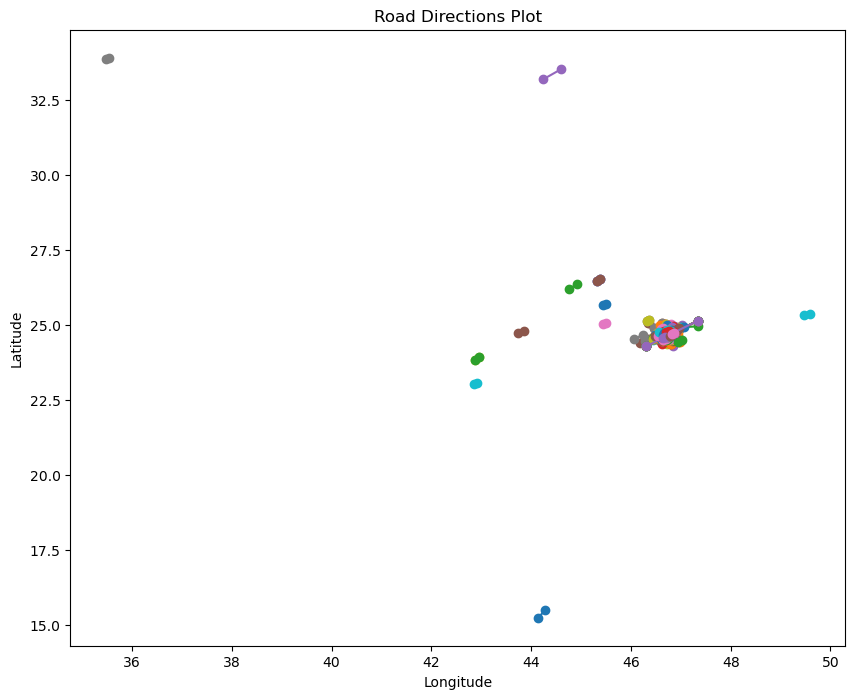

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

# Convert the string representation of tuples into actual tuples
df['Start_point'] = df['Start_point'].apply(ast.literal_eval)
df['End_point'] = df['End_point'].apply(ast.literal_eval)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot polylines for each road
for index, row in df.iterrows():
    start_lat, start_lng = row['Start_point']
    end_lat, end_lng = row['End_point']
    
    # Plot each road line with its start and end points
    plt.plot([start_lng, end_lng], [start_lat, end_lat], marker='o', label=row['Road Name'])

# Adding labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Road Directions Plot")

# Display the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


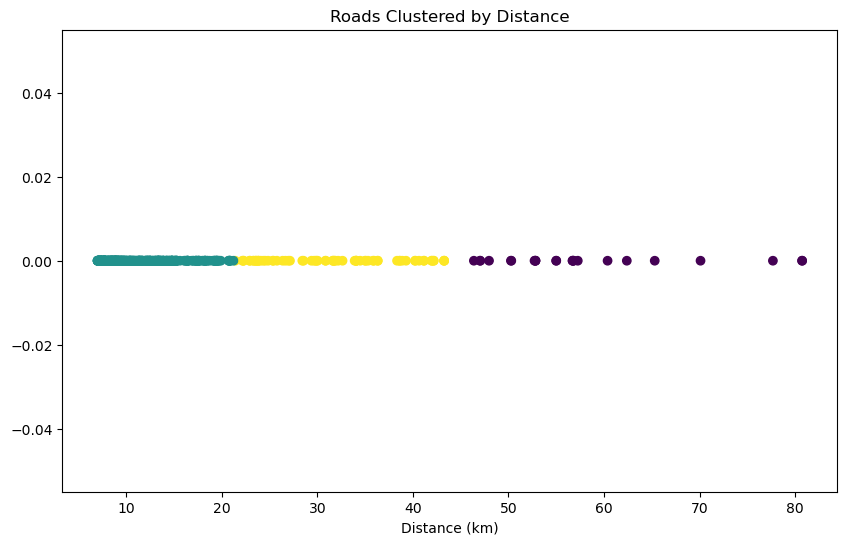

In [101]:
from sklearn.cluster import KMeans
import numpy as np

X = df[['Distance (km)']].values

kmeans = KMeans(n_clusters=3, random_state=0)

df['Distance_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['Distance (km)'], np.zeros_like(df['Distance (km)']), 
            c=df['Distance_Cluster'], cmap='viridis', label=df['Road Name'])
plt.xlabel("Distance (km)")
plt.title("Roads Clustered by Distance")
plt.show()

In [102]:
df['Start_lat'] = df['Start_point'].apply(lambda x: x[0])
df['Start_lng'] = df['Start_point'].apply(lambda x: x[1])
df['End_lat'] = df['End_point'].apply(lambda x: x[0])
df['End_lng'] = df['End_point'].apply(lambda x: x[1])

X_geo = np.vstack([
    df[['Start_lat', 'Start_lng']].values, 
    df[['End_lat', 'End_lng']].values
])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


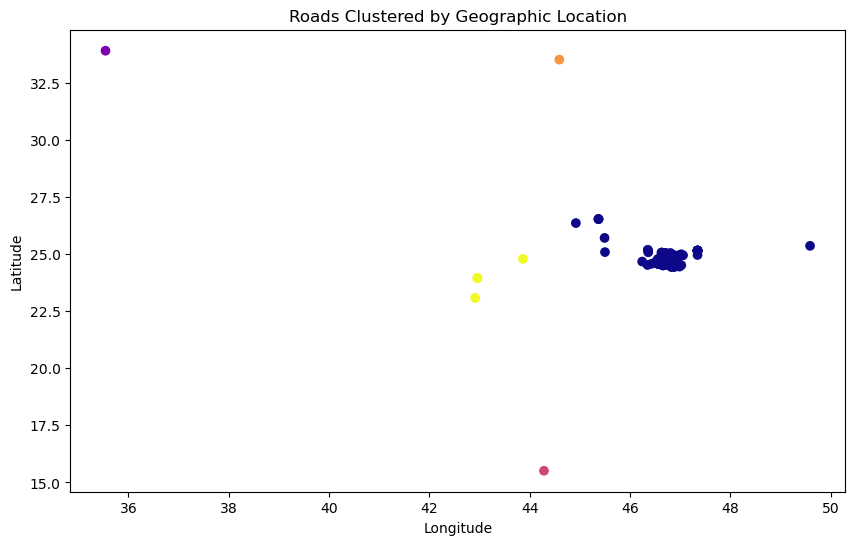

In [103]:
geo_kmeans = KMeans(n_clusters=5, random_state=0)
df['Geo_Cluster'] = geo_kmeans.fit_predict(df[['Start_lat', 'Start_lng']].values)

plt.figure(figsize=(10, 6))
plt.scatter(df['Start_lng'], df['Start_lat'], 
            c=df['Geo_Cluster'], cmap='plasma', label=df['Road Name'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Roads Clustered by Geographic Location")
plt.show()

In [120]:
def calculate_bearing(start, end):
    start_lat, start_lng = np.radians(start)
    end_lat, end_lng = np.radians(end)
    d_lng = end_lng - start_lng
    x = np.sin(d_lng) * np.cos(end_lat)
    y = np.cos(start_lat) * np.sin(end_lat) - (np.sin(start_lat) * np.cos(end_lat) * np.cos(d_lng))
    bearing = np.degrees(np.arctan2(x, y))
    return (bearing + 360) % 360  # Normalize to 0-360 degrees

df['Bearing'] = df.apply(lambda row: calculate_bearing(row['Start_point'], row['End_point']), axis=1)

X_bearing = df[['Bearing']].values
bearing_kmeans = KMeans(n_clusters=3, random_state=0)
df['Bearing_Cluster'] = bearing_kmeans.fit_predict(X_bearing)

# Step 6: Further refine by eliminating roads without alternatives
# This is done by checking if roads within a cluster have similar bearings and are close in distance
# We'll assume here that roads without alternatives are those with no nearby roads in the same cluster

# Step 7: Final list of roads after filtering
final_road_list = df[df['Bearing_Cluster'].notnull()]  # Further refinement can be done here

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [123]:
final_road_list['Bearing_Cluster'].value_counts()

Bearing_Cluster
2    259
1    177
0    131
Name: count, dtype: int64

In [116]:
# final_road_list

,Road Name,Distance (km),Time (mins),Ratio (km/min),Start_point,End_point,Distance_Cluster,Start_lat,Start_lng,End_lat,End_lng,Geo_Cluster,Bearing,Bearing_Cluster
3,القويعية,17.266,9.700000,1.780000,"(24.7586767, 46.70162699999999)","(24.7564578, 46.6969467)",1,24.758677,46.701627,24.756458,46.696947,0,242.432867,1
4,صلبوخ,36.323,25.416667,1.429102,"(24.5293006, 46.70255179999999)","(24.5263552, 46.7001172)",2,24.529301,46.702552,24.526355,46.700117,0,216.943178,2
5,اثيثية,26.970,19.866667,1.357550,"(24.6927378, 46.6672146)","(24.6903053, 46.6619341)",2,24.692738,46.667215,24.690305,46.661934,0,243.115485,1
7,أبي مروة,62.389,43.566667,1.432035,"(24.7210858, 46.8304302)","(24.718233, 46.8261919)",0,24.721086,46.830430,24.718233,46.826192,0,233.462368,1
8,Dammam Road,47.042,36.783333,1.278894,"(24.9568714, 47.0291162)","(24.7886798, 46.7188421)",0,24.956871,47.029116,24.788680,46.718842,0,239.207192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,السائب بن زيد,7.371,20.083333,0.367021,"(24.7469689, 46.8410273)","(24.706146, 46.8107557)",1,24.746969,46.841027,24.706146,46.810756,0,213.968440,2
698,ثمينة,9.220,15.916667,0.579267,"(24.8090501, 46.763115)","(24.772079, 46.71129089999999)",1,24.809050,46.763115,24.772079,46.711291,0,231.850211,2
699,بيدة,8.496,21.250000,0.399812,"(24.6137046, 46.6878894)","(24.5886539, 46.6349367)",1,24.613705,46.687889,24.588654,46.634937,0,242.522775,1
701,الحويرة,9.177,18.933333,0.484701,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)",1,24.686072,46.815346,24.643318,46.777666,0,218.699630,2


In [124]:
df_end = final_road_list[(final_road_list['Distance_Cluster'] == 1) & (final_road_list['Geo_Cluster'] == 0)]

In [125]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 3 to 704
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Road Name         467 non-null    object 
 1   Distance (km)     467 non-null    float64
 2   Time (mins)       467 non-null    float64
 3   Ratio (km/min)    467 non-null    float64
 4   Start_point       467 non-null    object 
 5   End_point         467 non-null    object 
 6   Distance_Cluster  467 non-null    int32  
 7   Start_lat         467 non-null    float64
 8   Start_lng         467 non-null    float64
 9   End_lat           467 non-null    float64
 10  End_lng           467 non-null    float64
 11  Geo_Cluster       467 non-null    int32  
 12  Bearing           467 non-null    float64
 13  Bearing_Cluster   467 non-null    int32  
dtypes: float64(8), int32(3), object(3)
memory usage: 49.3+ KB


## The Divider

In [9]:
import pandas as pd
import googlemaps
import os
from io import StringIO
from datetime import datetime
import uuid  # For generating unique filenames
import ast

# Function to determine traffic color
def determine_traffic_color(delay, duration):
    if delay < 0.05 * duration:
        return 'Blue'
    elif delay < 0.20 * duration:
        return 'Yellow'
    elif delay < 0.50 * duration:
        return 'Orange'
    elif delay < 1.00 * duration:
        return 'Red'
    else:
        return 'Dark Red'

# Function to get traffic data using start and end points from DataFrame
def get_traffic_data_from_dataframe(gmaps_client, start_lat, start_lng, end_lat, end_lng, road_name, city='Riyadh'):
    origin = f"{start_lat},{start_lng}"
    destination = f"{end_lat},{end_lng}"
    
    try:
        directions_result = gmaps_client.directions(
            origin, destination, mode="driving", departure_time="now", traffic_model="best_guess"
        )

        if not directions_result:
            return None

        route = directions_result[0]['legs'][0]
        duration_in_traffic_min = route['duration_in_traffic']['value'] / 60
        distance_km = route['distance']['value'] / 1000
        speed_kmh = distance_km / (duration_in_traffic_min / 60)
        delay_min = (route['duration_in_traffic']['value'] - route['duration']['value']) / 60
        traffic_condition = determine_traffic_color(delay_min, route['duration']['value'] / 60)
        timestamp = datetime.now().isoformat()
        
        return {
            'road_name': road_name,
            'distance_km': distance_km,
            'duration_in_traffic_min': duration_in_traffic_min,
            'speed_kmh': speed_kmh,
            'delay_min': delay_min,
            'traffic_condition': traffic_condition,
            'timestamp': timestamp,
        }
    except Exception as e:
        print(f"Error fetching traffic data for {road_name}: {e}")
        return None

# Function to generate traffic data for all roads in DataFrame
def generate_data_from_dataframe(csv_file, gmaps_client):
    df = pd.read_csv(csv_file)
    
    # Assuming your dataframe has columns: 'Road Name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'
    traffic_data_list = []
    df['Start_point'] = df['Start_point'].apply(ast.literal_eval)
    df['End_point'] = df['End_point'].apply(ast.literal_eval)
    
    for _, row in df.iterrows():
        road_name = row['Road Name']
        # start_lat = row['start_lat']
        # start_lng = row['start_lng']
        start_lat,start_lng = row['Start_point']
        end_lat,end_lng = row['End_point']
        # end_lat = row['end_lat']
        # end_lng = row['end_lng']
        
        traffic_data = get_traffic_data_from_dataframe(gmaps_client, start_lat, start_lng, end_lat, end_lng, road_name)
        
        if traffic_data:
            traffic_data_list.append(traffic_data)

    if traffic_data_list:
        # Convert traffic data list to DataFrame
        traffic_df = pd.DataFrame(traffic_data_list)
        
        # Generate a unique filename using UUID and timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        unique_filename = f"traffic_data_{timestamp}_{uuid.uuid4()}.csv"
        
        # Write to local CSV file
        traffic_df.to_csv(unique_filename, index=False)
        
        print(f"Traffic data saved as '{unique_filename}'.")

# Run the function with your CSV file
generate_data_from_dataframe('filtered_road_names.csv', gmaps)


Traffic data saved as 'traffic_data_20240917_182934_6b95205c-fa76-464b-98ea-b481fe924188.csv'.


In [6]:
# import boto3
import pandas as pd
import googlemaps
import os
from io import StringIO
from datetime import datetime
import uuid  # For generating unique filenames

# Function to determine traffic color
def determine_traffic_color(delay, duration):
    if delay < 0.05 * duration:
        return 'Blue'
    elif delay < 0.20 * duration:
        return 'Yellow'
    elif delay < 0.50 * duration:
        return 'Orange'
    elif delay < 1.00 * duration:
        return 'Red'
    else:
        return 'Dark Red'

# Function to get traffic data from Google Maps
def get_traffic_data(gmaps_client, road_name, city='Riyadh'):
    start_coords, end_coords = get_road_start_end(gmaps_client, road_name, city)
    
    if not start_coords or not end_coords:
        print(f"Could not retrieve start/end points for {road_name}.")
        return None

    origin = f"{start_coords[0]},{start_coords[1]}"
    destination = f"{end_coords[0]},{end_coords[1]}"
    
    try:
        directions_result = gmaps_client.directions(
            origin, destination, mode="driving", departure_time="now", traffic_model="best_guess"
        )

        if not directions_result:
            return None

        route = directions_result[0]['legs'][0]
        duration_in_traffic_min = route['duration_in_traffic']['value'] / 60
        distance_km = route['distance']['value'] / 1000
        speed_kmh = distance_km / (duration_in_traffic_min / 60)
        delay_min = (route['duration_in_traffic']['value'] - route['duration']['value']) / 60
        traffic_condition = determine_traffic_color(delay_min, route['duration']['value'] / 60)
        timestamp = datetime.now().isoformat()
        
        return {
            'road_name': road_name,
            'distance_km': distance_km,
            'duration_in_traffic_min': duration_in_traffic_min,
            'speed_kmh': speed_kmh,
            'delay_min': delay_min,
            'traffic_condition': traffic_condition,
            'timestamp': timestamp,
        }
    except Exception as e:
        print(f"Error fetching traffic data for {road_name}: {e}")
        return None

# Function to generate traffic data and save to S3 with unique filenames
def generate_data_for_first_10_roads(csv_file, gmaps_client):
    df = pd.read_csv(csv_file)
    road_names = df['Road Name']
    traffic_data_list = [get_traffic_data(gmaps_client, road, city='Riyadh') for road in road_names if get_traffic_data(gmaps_client, road, city='Riyadh')]

    if traffic_data_list:
        # Convert traffic data list to DataFrame
        traffic_df = pd.DataFrame(traffic_data_list)
        
        # Generate a unique filename using UUID and timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        unique_filename = f"traffic_data_{timestamp}_{uuid.uuid4()}.csv"
        
        # Write to in-memory CSV buffer
        # csv_buffer = StringIO()
        traffic_df.to_csv(unique_filename, index=False)

        # # Upload to S3
        # s3 = boto3.client('s3')
        # s3.put_object(Bucket='your_bucket_name', Key=unique_filename, Body=csv_buffer.getvalue())
        
        print(f"Traffic data saved to S3 as '{unique_filename}'.")

generate_data_for_first_10_roads('filtered_road_names.csv', gmaps)

NameError: name 'get_road_start_end' is not defined

Traffic data for the first 10 roads saved to 'test_traffic_data.csv'.


In [53]:
# # Function to get traffic data
# def get_traffic_data(origin, destination):
#     try:
#         directions_result = gmaps.directions(origin, destination, departure_time='now')
#         route = directions_result[0]['legs'][0]
#         traffic_data = {
#             'route_id': f"{origin}_{destination}_{datetime.now().strftime('%Y%m%d%H%M%S')}",
#             'origin': origin,
#             'destination': destination,
#             'distance_km': route['distance']['value'] / 1000,
#             'duration_min': route['duration']['value'] / 60,
#             'duration_in_traffic_min': route['duration_in_traffic']['value'] / 60,
#             'departure_time': datetime.now().isoformat(),
#             'traffic_condition': 'N/A',  # This needs to be determined based on speed and delay
#             'speed_kmh': (route['distance']['value'] / 1000) / (route['duration_in_traffic']['value'] / 3600),
#             'delay_min': (route['duration_in_traffic']['value'] - route['duration']['value']) / 60,
#             'timestamp': datetime.now().isoformat(),
#             'day_of_week': datetime.now().strftime('%A'),
#             'time_of_day': datetime.now().strftime('%p')  # AM/PM format for time of day
#         }
#         return traffic_data
#     except Exception as e:
#         print(f"Error fetching data for {origin} to {destination}: {e}")
#         return None

In [54]:
# # Initialize data lists
# routes_list = []
# traffic_conditions_list = []
# points_of_interest_list = []
# traffic_data_list = []

# # Collect data
# poi_id_counter = 1
# for origin, destination in directions:
#     route_data = get_traffic_data(origin, destination)
#     if route_data:
#         # Add route to routes_list
#         route_id = route_data['route_id']
#         if route_id not in [route['route_id'] for route in routes_list]:
#             routes_list.append({
#                 'route_id': route_id,
#                 'origin': origin,
#                 'destination': destination,
#                 'distance_km': route_data['distance_km']
#             })
        
#         # Add traffic condition to traffic_conditions_list
#         traffic_condition_id = len(traffic_conditions_list) + 1
#         traffic_conditions_list.append({
#             'condition_id': traffic_condition_id,
#             'route_id': route_id,
#             'duration_min': route_data['duration_min'],
#             'duration_in_traffic_min': route_data['duration_in_traffic_min'],
#             'departure_time': route_data['departure_time'],
#             'speed_kmh': route_data['speed_kmh'],
#             'delay_min': route_data['delay_min'],
#             'timestamp': route_data['timestamp'],
#             'day_of_week': route_data['day_of_week'],
#             'time_of_day': route_data['time_of_day']
#         })
        
#         # Add points of interest to points_of_interest_list
#         for place in popular_places:
#             poi_name = place['name']
#             if poi_name not in [poi['poi_name'] for poi in points_of_interest_list]:
#                 points_of_interest_list.append({
#                     'poi_id': poi_id_counter,
#                     'route_id': route_id,
#                     'poi_name': poi_name,
#                     'poi_type': place.get('types', ['unknown'])[0],
#                     'poi_distance_m': place.get('distance', 'N/A'),  # Placeholder for distance
#                     'poi_impact': 'N/A'  # Placeholder for impact
#                 })
#                 poi_id_counter += 1
        
#         # Add traffic data to traffic_data_list
#         traffic_data_list.append({
#             'data_id': len(traffic_data_list) + 1,
#             'route_id': route_id,
#             'condition_id': traffic_condition_id,
#             'poi_id': poi_id_counter - 1  # Assuming the last added POI is relevant
#         })
        
#         if len(traffic_data_list) >= 20000:
#             break

# # Convert to DataFrame
# routes_df = pd.DataFrame(routes_list)
# traffic_conditions_df = pd.DataFrame(traffic_conditions_list)
# points_of_interest_df = pd.DataFrame(points_of_interest_list)
# traffic_data_df = pd.DataFrame(traffic_data_list)

# # Display DataFrames
# print("Routes:")
# print(routes_df.head())
# print("\nTraffic Conditions:")
# print(traffic_conditions_df.head())
# print("\nPoints of Interest:")
# print(points_of_interest_df.head())
# print("\nTraffic Data:")
# print(traffic_data_df.head())

# # Save data to CSV
# routes_df.to_csv('routes.csv', index=False)
# traffic_conditions_df.to_csv('traffic_conditions.csv', index=False)
# points_of_interest_df.to_csv('points_of_interest.csv', index=False)
# traffic_data_df.to_csv('traffic_data.csv', index=False)


NameError: name 'directions' is not defined